Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 00b: Cameras and Noise

## Introduction

This is the second introductory exercise sheet. It is somewhat shorter than the regular sheets, intended to make yourselves familiar with our procedures. This sheet should be solved in groups and solutions should be uploaded to your group's dedicated folder in Stud.IP before **Tuesday, November 2nd, 14:00**. 
In case you cannot do this sheet (due to technical or organizational problems) please upload a description of your problem instead. Your tutor will help you to solve the problems in the first feedback session and you may hand in this sheet together with the first regular sheet one week later.

In case of questions, feel free to post them to the forum and/or raise them in the next practice session.

## Assignment 1: Pinhole Camera and One Chip Cameras
In this assignment we will use the pinhole camera model and formulae from slides CV-02 page 10.

Imagine a very low budget autonomous car with a pinhole camera with a focal length of $24\,\text{mm}$ at the front.

![slides2_10.png](slides2_10.png)


**(a)** A pedestrian walks in front of the car. On the camera sensor the image of the person has a height of $12\,\text{mm}$. Assume that the person is of average height of $1.70\,\text{m}$. How far is the car away from the person?

What We Know:
$$F' = 24mm$$
$$X' = 12mm$$
$$X = 1.70m, 1700mm$$

What We Want:
Z

Equations:
$$X' = F'* \frac {X}{Z}$$ 
$$Y' = F'* \frac {Y}{Z}$$

We need the second equation in this case.

Plug In:
$$12mm = 24mm * (1700mm/Z)$$

Solve for Z:
$$12 * 24 = 1700/Z$$
$$288 = 1700/Z$$
$$288Z = 1700$$
$$Z = 1700/288$$
$$Z = 5.902$$

The car is 5.902 mm from the person, so basically right on top of them.

**(b)** A rectangular traffic sign with a width of $0.75\,\text{m}$ and a height of $0.50\,\text{m}$ is $2\,\text{m}$ away from the front of the same car with the same camera. This camera is a One Chip Camera with a Bayer Filter. Each colour pixel has a size of $10\,\text{μm}$ How many green pixels are inside the image of the traffic sign?

What We Know:
$$X = 0.75m$$
$$Y = 0.5m$$
$$F'= 24mm, 0.024m$$
$$Z = 2m$$

What We Want:
X'
Y'

Equations:
$$X' = F'* \frac {X}{Z}$$ 
$$Y' = F'* \frac {Y}{Z}$$

We need both in this case. 

Solve for X':

$$X' = 0.024 * \frac {0.75}{2}$$
$$Y' = 0.024 * \frac {0.5}{2}$$

X' = .009m
Y' = .006m

Area taken up by image of rectangular sign on image plane: X' * Y' = .000054m

Convert to microns.

$$.000054 * 1000000$$

Size of rectangle on image plane: 54 microns

Calculate number of pixels within image (each pixel being 10 microns): $$\frac {54}{10}$$

5.4 pixels in image plane, so let's say 6 pixels with the rectangle sign on them. 

Now, consider the type of camera being used. It is a one-chip camera, so we are only dealing with one pixel grid. Also, it is using the Bayer Filter. If we assume the pixels the rectangle is covering are in a 2 by 3 arrangement, we can overlay the Bayer Filter pattern on them to determine how many of the pixels will be shifted green. 

Assuming we use the Bayer pattern which begins with a green square in the upper left corner, 3 of the pixels containing the rectangle will be shifted green. 

So, number of green pixels inside the image of the traffic sign: 3


## Assignment 2: Noise

In this assignment we will use `numpy.random` functions to add artificial noise to one of our images. Normally, we are interested in removing noise from images. However, if we want to make an algorithm robust against noise, we might want to create artificial images with controlled noise.

**(a)** Add Gaussian noise to an image with the help of ``numpy.random.normal``. Try different standard deviations of the distribution. A good starting value would be $20$.

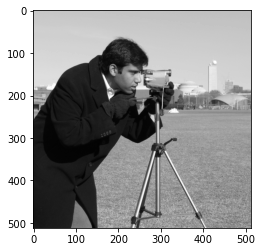

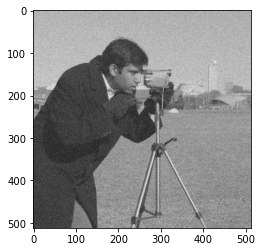

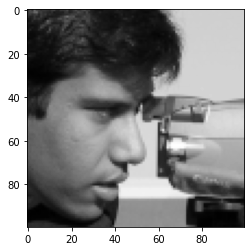

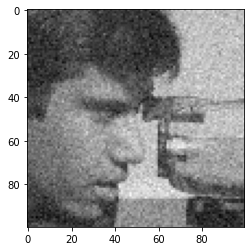

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import numpy as np

sigma = 20
im = imageio.imread("imageio:camera.png")

im_noisy = im.copy()

gaussiannoise = np.random.normal(0, sigma, (im.shape[0], im.shape[1]))

im_noisy = im + gaussiannoise 

plt.figure()
plt.gray()
plt.imshow(im)
plt.figure()
plt.imshow(im_noisy)
plt.figure()
plt.imshow(im[100:200,200:300])
plt.figure()
plt.imshow(im_noisy[100:200,200:300])
plt.show()

#Higher standard deviation = more noise in the image, because each noise value being added to the original will be further
#from the original value and thus shift that value more when noise is added in?

**(b)** Add Salt-and-pepper noise to one of our images. Create one image with $5\%$ noise and one with $50\%$. Experiment with other values. Can you give a threshold when is the noise disruptive?

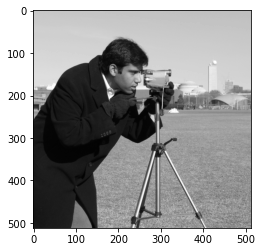

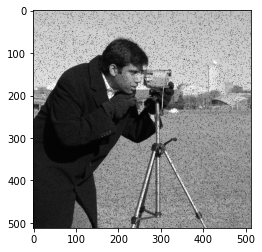

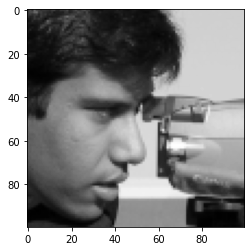

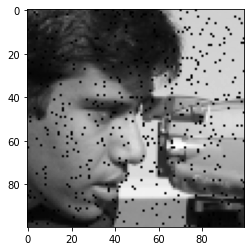

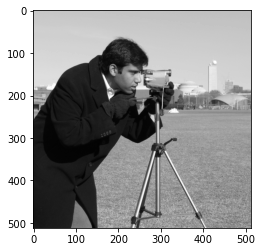

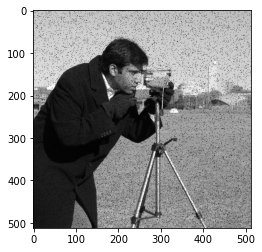

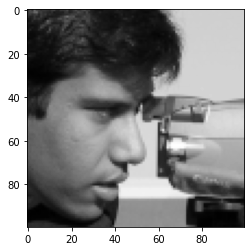

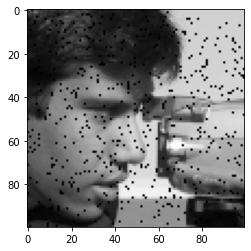

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import numpy as np

noise_ratio = .20
im = imageio.imread("imageio:camera.png")

im_noisy05 = im.copy()
im_noisy50 = im.copy()

amountnoisy = .05
noisypixels = int(262144*amountnoisy)

for i in range (noisypixels):
    amountnoisy = 0.05
    noisypixels = int(262144*amountnoisy)
    xvaluenoise = np.random.randint(0,512)
    yvaluenoise = np.random.randint(0,512)
    decider = np.random.randint(0,1)
    if decider == 0:
        im_noisy05[xvaluenoise][yvaluenoise] = 0
    if decider == 1:
        im_noisy05[xvaluenoise][yvaluenoise] = 255

plt.figure()
plt.gray()
plt.imshow(im)

plt.figure()
plt.imshow(im_noisy05)
plt.figure()
plt.imshow(im[100:200,200:300])
plt.figure()
plt.imshow(im_noisy05[100:200,200:300])
plt.show()

for i in range (noisypixels):
    amountnoisy = 0.50
    noisypixels = int(262144*amountnoisy)
    xvaluenoise = np.random.randint(0,512)
    yvaluenoise = np.random.randint(0,512)
    decider = np.random.randint(0,1)
    if decider == 0:
        im_noisy50[xvaluenoise][yvaluenoise] = 0
    if decider == 1:
        im_noisy50[xvaluenoise][yvaluenoise] = 0

plt.figure()
plt.gray()
plt.imshow(im)

plt.figure()
plt.imshow(im_noisy50)
plt.figure()
plt.imshow(im[100:200,200:300])
plt.figure()
plt.imshow(im_noisy50[100:200,200:300])
plt.show()

#current issue with the above code is that it could theoretically select the same pixel twice and not actually
#change the full 5% or 50% of the pixels
#possible solution might be to include the values 0-512 in a list and tell it to exclude whatever value it selects
#each round. 
#Also I haven't made it display both images with their respective proper noise levels yet. 

Any amount of noise is "disruptive," but I would say you're already having trouble making out background features around 
20%.

**(c)** How could we remove noise from an image. Do you have an idea for Gaussian Noise? Do you have an idea for Salt-and-pepper noise? This is a brainstorming questions! We do not except working solutions but ideas on how you would approach the problem!

Gaussian Noise - Since we know the noise itself is normally distributed, there might be a way to look for this pattern in the noise and then remove it from each channel. 

Salt-and-Pepper Noise - The issue with salt and pepper noise is that single pixels are shifted full black (0) or full white (255). If we assume the gray value change between the issue pixel and the pixels around it is not very large, we could probably use the surrounding values to get a decent approximation of how white/black the center issue pixel should be (measures of central tendency - mean, median of the surrounding gray values?)